In [116]:
import pandas as pd 
import matplotlib.pyplot as plt 
import os
import numpy as np
import scipy.stats as stats
    


## Daily Data

<Axes: title={'center': 'Federal Funds Effective Rate'}, xlabel='Date', ylabel='Interest Rate (%)'>

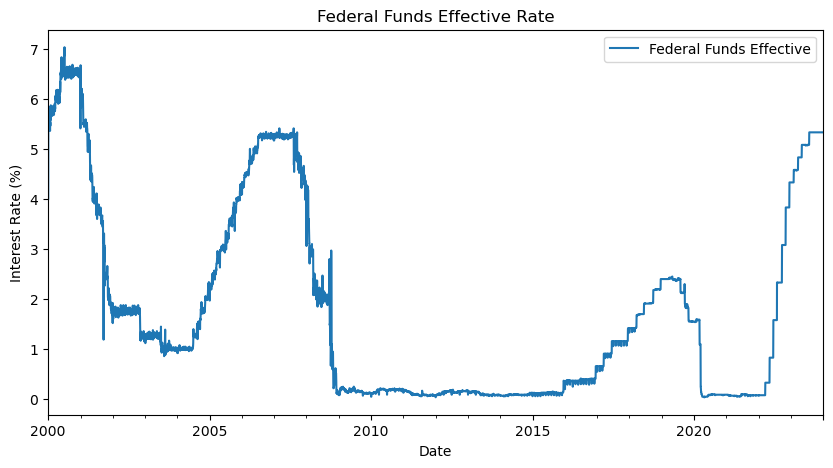

In [117]:
daily_df = pd.read_csv('resources/clean_data/daily/DFF.csv', index_col="DATE", parse_dates=True)
daily_df.rename(columns={'DFF': 'Federal Funds Effective'}, inplace=True)

daily_df.plot(xlabel="Date", ylabel="Interest Rate (%)", title="Federal Funds Effective Rate", figsize=(10, 5))

## Monthly Data

<Axes: title={'center': 'Federal Funds Effective Rate'}, xlabel='Date', ylabel='Interest Rate (%)'>

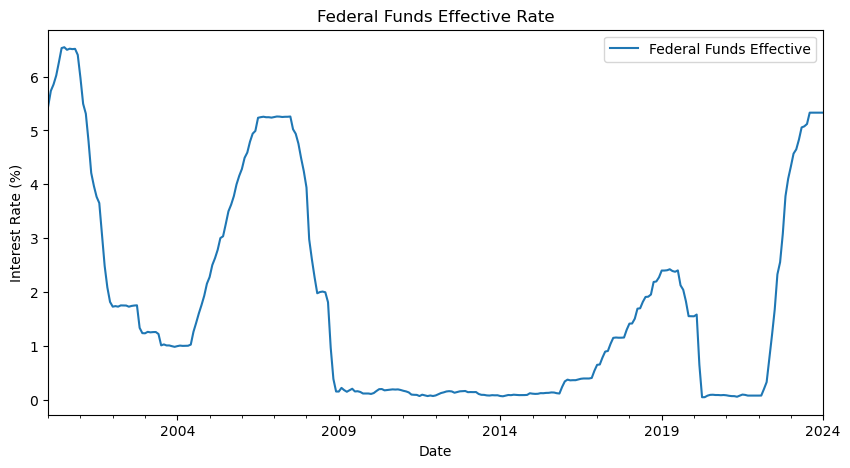

In [118]:
# Cast the daily data to monthly data
monthly_df = daily_df.resample('M').mean()
monthly_df.plot(xlabel="Date", ylabel="Interest Rate (%)", title="Federal Funds Effective Rate", figsize=(10, 5))

In [119]:
# shift index dates to first day of the month and reset index
monthly_df.index = monthly_df.index.to_period('M').to_timestamp()
monthly_df.reset_index(inplace=True)

# read in all monthly data files and merge them into the monthly_df
all_dfs = [pd.read_csv(f'resources/clean_data/monthly/{datafile}', parse_dates=['DATE']) for datafile in os.listdir('resources/clean_data/monthly') if datafile.endswith('.csv')]
_ = [monthly_df := monthly_df.merge(df, on='DATE', how='left') for df in all_dfs]

# Set the DATE column as the index of the monthly_df
monthly_df.set_index('DATE', inplace=True)

monthly_df.drop(columns=['MEDCPIM158SFRBCLE', 'FED Interest Rate'], inplace=True)

monthly_df.rename(columns={'UNRATE': 'Unemployment Rate'}, inplace=True)

# View the first few rows of the monthly_df
monthly_df.head()

,Federal Funds Effective,Federal Surplus/Deficit,Unemployment Rate,CPI (Inflation)
DATE,,,,
2000-01-01,5.448387,62152.0,4.0,3.85
2000-02-01,5.734828,-41734.0,4.1,2.79
2000-03-01,5.853548,-35380.0,4.0,3.42
2000-04-01,6.019667,159497.0,3.8,2.28
2000-05-01,6.268065,-3611.0,4.0,2.85


array([<Axes: xlabel='DATE'>, <Axes: xlabel='DATE'>,
       <Axes: xlabel='DATE'>, <Axes: xlabel='DATE'>], dtype=object)

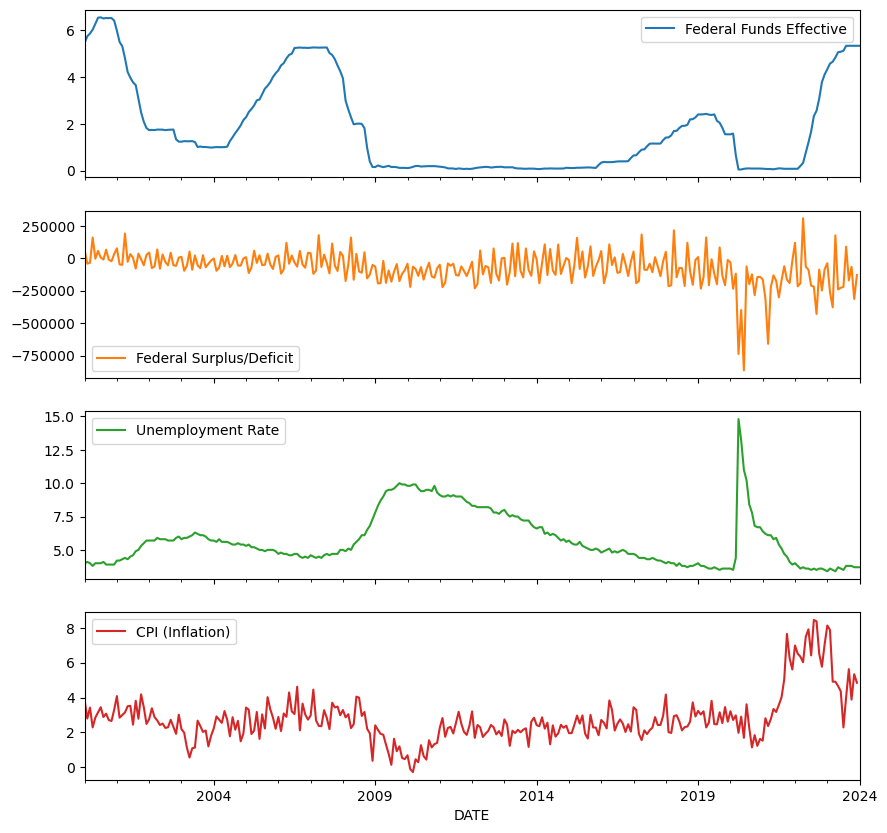

In [120]:
monthly_df.plot(subplots=True, figsize=(10, 10))

## Quarterly Data

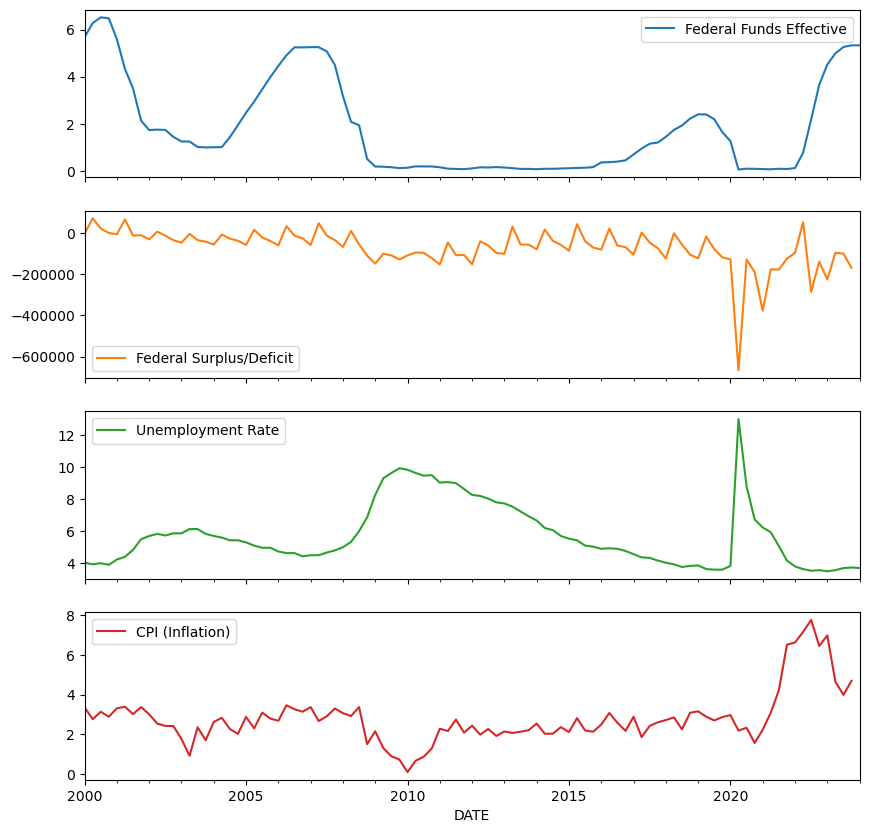

In [121]:
# Cast monthly_df to quarterly data
quarterly_df = monthly_df.resample('Q').mean()
quarterly_df.plot(subplots=True, figsize=(10, 10))

# setindex to first day of each quarter
quarterly_df.index = quarterly_df.index.to_period('Q').to_timestamp()

In [122]:
# read in all monthly data files and merge them into the quarterly_df
all_quarterly_dfs = [pd.read_csv(f'resources/clean_data/quarterly/{datafile}', parse_dates=['DATE']) for datafile in os.listdir('resources/clean_data/quarterly') if datafile.endswith('.csv')]
_ = [quarterly_df := quarterly_df.merge(df, on='DATE', how='left') for df in all_quarterly_dfs]

# Set the DATE column as the index of the quarterly_df
quarterly_df.set_index('DATE', inplace=True)

# View the first few rows of the quarterly_df
quarterly_df.head()

,Federal Funds Effective,Federal Surplus/Deficit,Unemployment Rate,CPI (Inflation),Foreign Direct Investment,Federal Tax Receipts,GDP by Billion
DATE,,,,,,,
2000-01-01,5.678921,-4987.333333,4.033333,3.353333,207400.0,1272.073,10002.179
2000-04-01,6.272022,70591.333333,3.933333,2.756667,365568.0,1284.187,10247.720
2000-07-01,6.519430,20127.000000,4.000000,3.130000,318888.0,1291.650,10318.165
2000-10-01,6.475315,-781.666667,3.900000,2.883333,389484.0,1306.215,10435.744
2001-01-01,5.593687,-7483.666667,4.233333,3.303333,236820.0,1301.000,10470.231


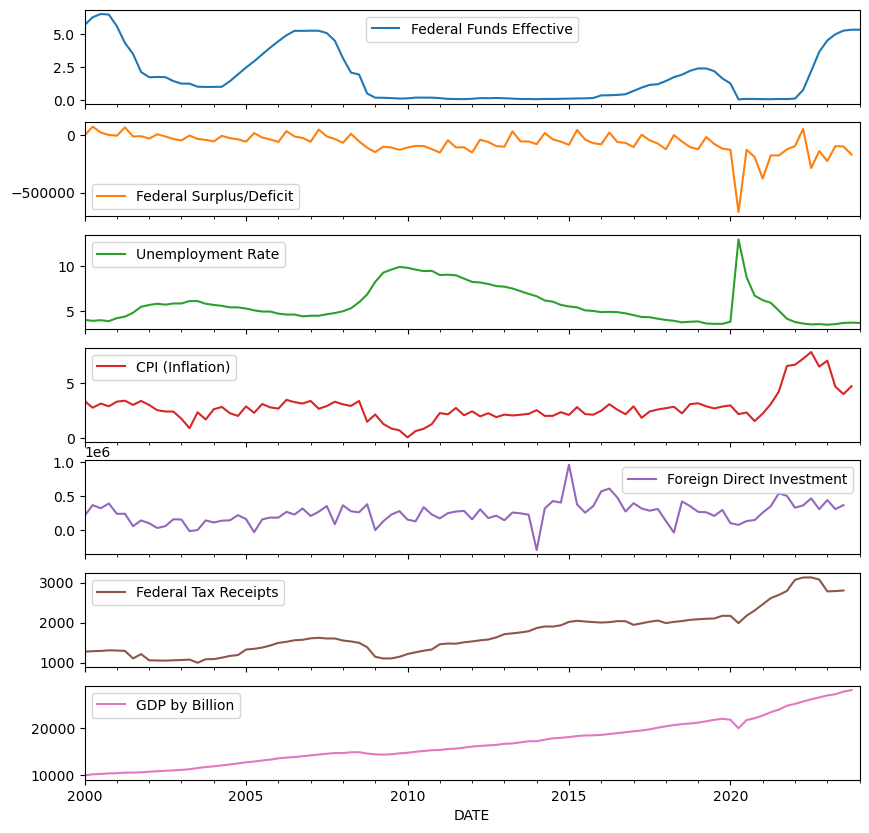

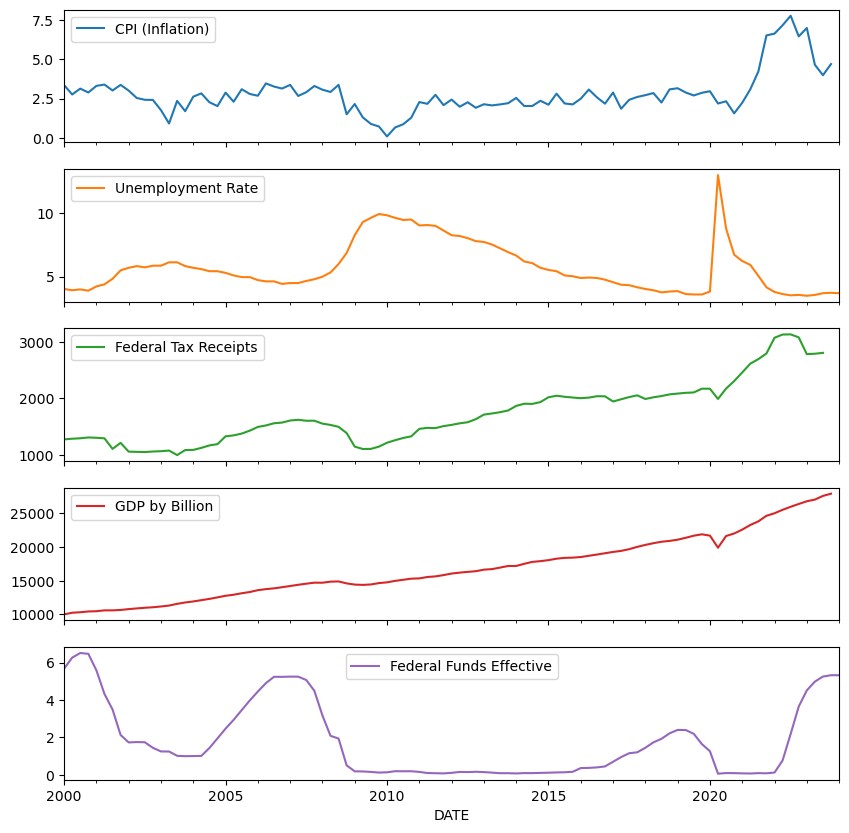

In [123]:
quarterly_df.plot(subplots=True, figsize=(10, 10))

# plot only the CPI (Inflation), Unemployment Rate, and Federal Tax Reciepts columns from the quarterly_df
quarterly_df[['CPI (Inflation)', 'Unemployment Rate', 'Federal Tax Receipts', 'GDP by Billion', 'Federal Funds Effective']].plot(subplots=True, figsize=(10, 10))

# Save the plot
plt.savefig('plots/quarterly_economic_indicators.png')

## Yearly Data

,Federal Funds Effective,Federal Surplus/Deficit,Unemployment Rate,CPI (Inflation),Foreign Direct Investment,Federal Tax Receipts,GDP by Billion
DATE,,,,,,,
2000-01-01,6.236422,21237.333333,3.966667,3.030833,320335.0,1288.53125,10250.95200
2001-01-01,3.887125,7855.250000,4.741667,3.266667,168046.0,1226.82275,10581.92900
2002-01-01,1.667175,-19222.583333,5.783333,2.591667,85958.0,1053.18425,10929.10825
2003-01-01,1.127535,-33254.916667,5.991667,1.681667,69512.0,1053.86400,11456.44950
2004-01-01,1.348928,-33253.166667,5.541667,2.432500,151731.0,1140.59650,12217.19575


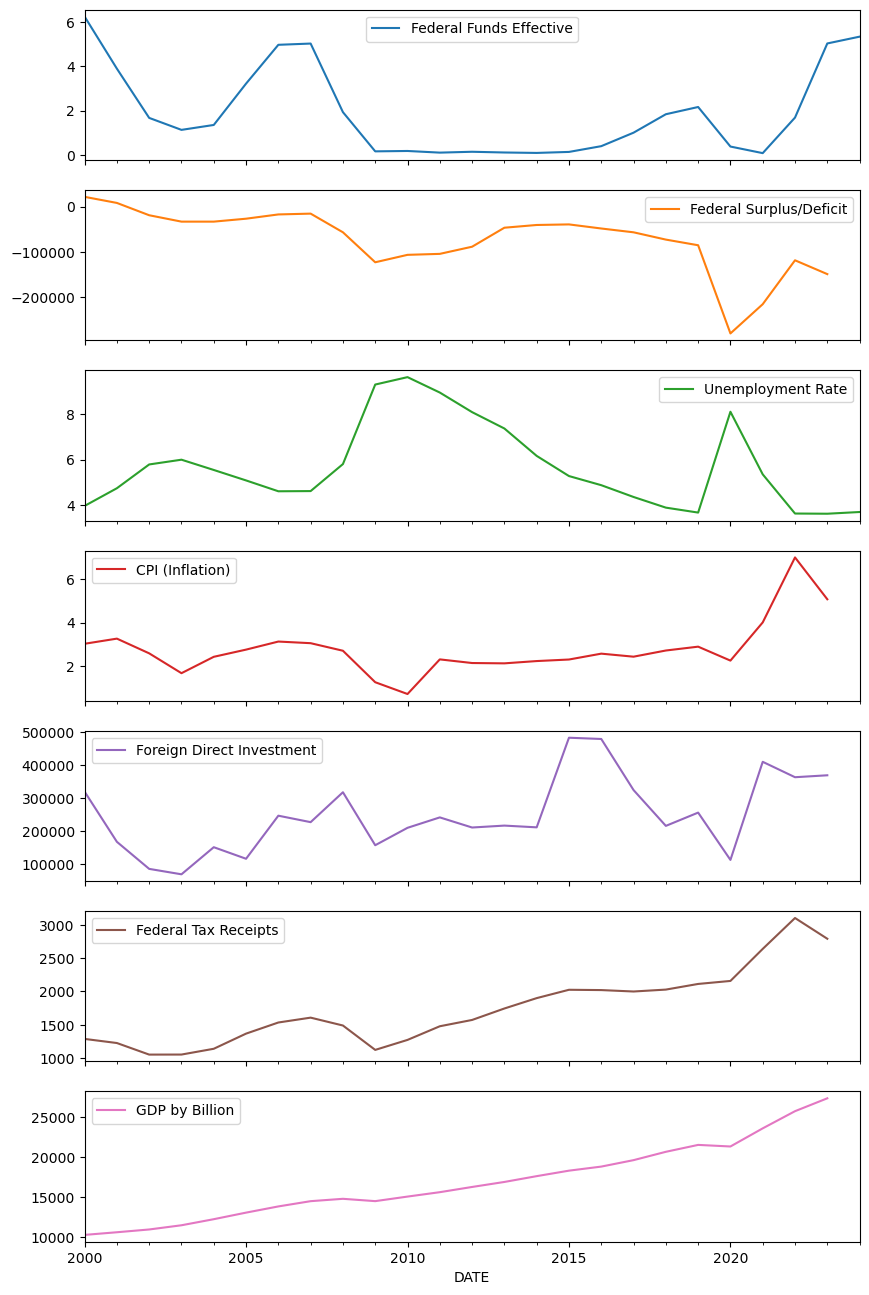

In [124]:
# cast quarterly_df to yearly data
annual_df = quarterly_df.resample('Y').mean()
annual_df.plot(subplots=True, figsize=(10, 16))

# save the plot
plt.savefig('resources/clean_data/annual/annual_data.png')

# setindex to first day of each year
annual_df.index = annual_df.index.to_period('Y').to_timestamp()

annual_df.head()

In [125]:
# read in all annual data files and merge them into the yearly_df
all_annual_df = [pd.read_csv(f'resources/clean_data/annual/{datafile}', parse_dates=['DATE']) for datafile in os.listdir('resources/clean_data/annual') if datafile.endswith('.csv')]
_ = [annual_df := annual_df.merge(df, on='DATE', how='left') for df in all_annual_df]

# Set the DATE column as the index of the quarterly_df
annual_df.set_index('DATE', inplace=True)

# View the first few rows of the quarterly_df
annual_df.head(30)

,Federal Funds Effective,Federal Surplus/Deficit,Unemployment Rate,CPI (Inflation),Foreign Direct Investment,Federal Tax Receipts,GDP by Billion,US Aggravated Assault Rate by 100k,US Burglary Rate by 100k,US Larceny Rate by 100k,US Motor Vehicle Theft Rate by 100k,US Property Crime Rate by 100k,US Violent Crime Rate by 100k,Anxiety,Depressive Disorder,Alcohol/Substance Use
DATE,,,,,,,,,,,,,,,,
2000-01-01,6.236422,21237.333333,3.966667,3.030833,320335.000000,1288.53125,10250.95200,324.0,728.8,2477.3,412.2,3618.3,506.5,NaN,NaN,NaN
2001-01-01,3.887125,7855.250000,4.741667,3.266667,168046.000000,1226.82275,10581.92900,318.6,741.8,2485.7,430.5,3658.1,504.5,NaN,NaN,NaN
2002-01-01,1.667175,-19222.583333,5.783333,2.591667,85958.000000,1053.18425,10929.10825,309.5,747.0,2450.7,432.9,3630.6,494.4,NaN,NaN,NaN
2003-01-01,1.127535,-33254.916667,5.991667,1.681667,69512.000000,1053.86400,11456.44950,295.4,741.0,2416.5,433.7,3591.2,475.8,NaN,NaN,NaN
2004-01-01,1.348928,-33253.166667,5.541667,2.432500,151731.000000,1140.59650,12217.19575,288.6,730.3,2362.3,421.5,3514.1,463.2,NaN,NaN,NaN
2005-01-01,3.212844,-26814.916667,5.083333,2.762500,116655.000000,1367.82325,13039.19700,290.8,726.9,2287.8,416.8,3431.5,469.0,NaN,NaN,NaN
2006-01-01,4.962731,-17434.916667,4.608333,3.132500,247326.000000,1534.77550,13815.58300,292.0,733.1,2213.2,400.2,3346.6,479.3,NaN,NaN,NaN
2007-01-01,5.018885,-15661.666667,4.616667,3.057500,227714.000000,1607.65675,14474.22700,287.2,726.1,2185.4,364.9,3276.4,471.8,NaN,NaN,NaN
2008-01-01,1.926586,-56705.750000,5.800000,2.710833,318450.000000,1489.51600,14769.86175,277.5,733.0,2166.1,315.4,3214.6,458.6,NaN,NaN,NaN


array([<Axes: xlabel='DATE'>, <Axes: xlabel='DATE'>,
       <Axes: xlabel='DATE'>, <Axes: xlabel='DATE'>,
       <Axes: xlabel='DATE'>, <Axes: xlabel='DATE'>,
       <Axes: xlabel='DATE'>, <Axes: xlabel='DATE'>,
       <Axes: xlabel='DATE'>, <Axes: xlabel='DATE'>,
       <Axes: xlabel='DATE'>, <Axes: xlabel='DATE'>,
       <Axes: xlabel='DATE'>, <Axes: xlabel='DATE'>,
       <Axes: xlabel='DATE'>, <Axes: xlabel='DATE'>], dtype=object)

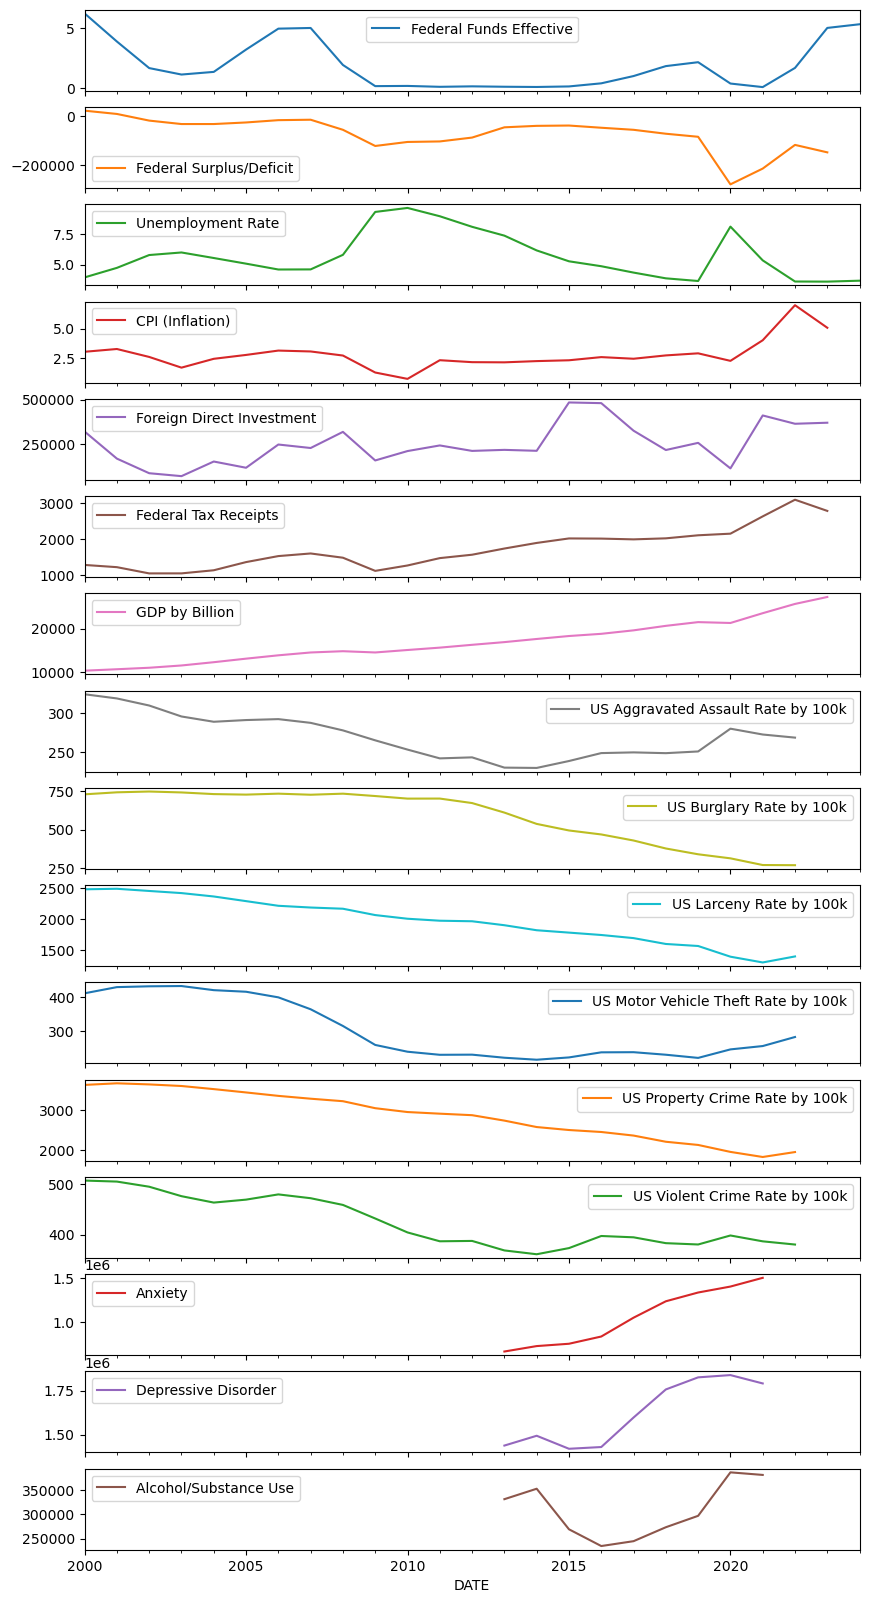

In [126]:
annual_df.plot(subplots=True, figsize=(10, 20))

# Correlations

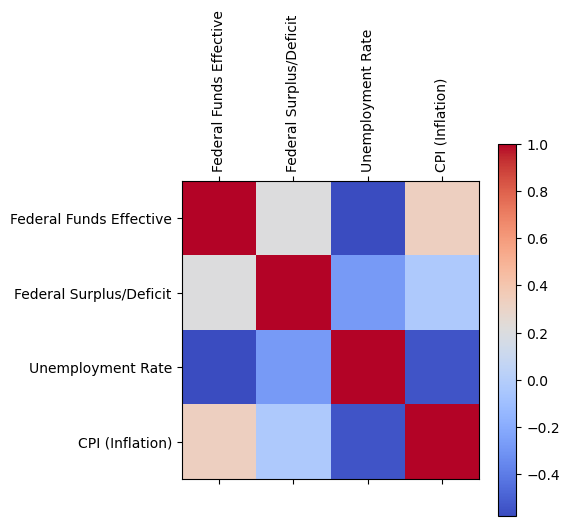

In [127]:
# Create a correlation matrix for all columns in monthly_df
correlation = monthly_df.corr()
correlation

# Create a heatmap from the correlation matrix
plt.matshow(correlation, cmap='coolwarm')
plt.colorbar()
plt.xticks(range(len(correlation.columns)), correlation.columns, rotation=90)
plt.yticks(range(len(correlation.columns)), correlation.columns)
plt.show()



In [128]:
# Create a correlation matrix  for all columns in quarterly_df
correlation = quarterly_df.corr()
correlation



,Federal Funds Effective,Federal Surplus/Deficit,Unemployment Rate,CPI (Inflation),Foreign Direct Investment,Federal Tax Receipts,GDP by Billion
Federal Funds Effective,1.000000,0.296038,-0.585830,0.356593,0.002890,-0.093246,-0.183052
Federal Surplus/Deficit,0.296038,1.000000,-0.388092,-0.082996,-0.013297,-0.354454,-0.463405
Unemployment Rate,-0.585830,-0.388092,1.000000,-0.594118,-0.265321,-0.389043,-0.246433
CPI (Inflation),0.356593,-0.082996,-0.594118,1.000000,0.282364,0.665115,0.522189
Foreign Direct Investment,0.002890,-0.013297,-0.265321,0.282364,1.000000,0.458320,0.386838
Federal Tax Receipts,-0.093246,-0.354454,-0.389043,0.665115,0.458320,1.000000,0.951788
GDP by Billion,-0.183052,-0.463405,-0.246433,0.522189,0.386838,0.951788,1.000000


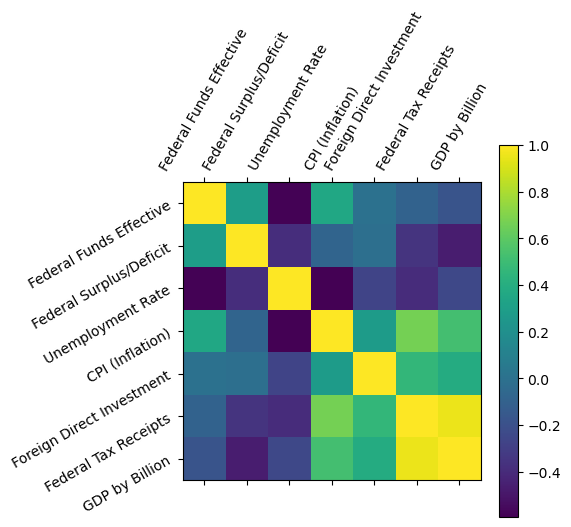

In [129]:

# Plot correlation heatmap  for all columns in monthly_df include a legend
plt.matshow(quarterly_df.corr())
plt.colorbar()
plt.xticks(range(len(quarterly_df.columns)), quarterly_df.columns, rotation=60)
plt.yticks(range(len(quarterly_df.columns)), quarterly_df.columns, rotation=30)

plt.show()


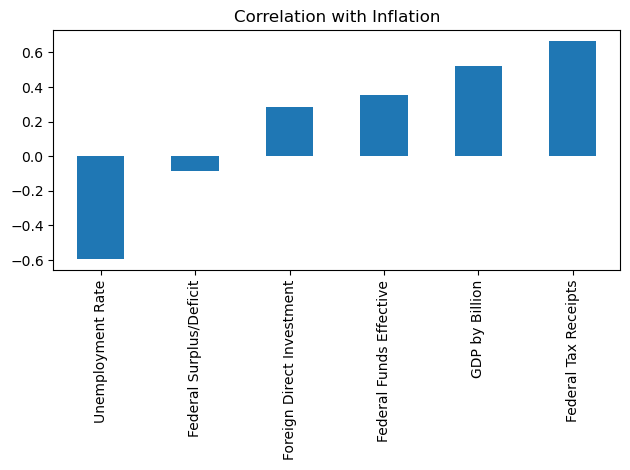

In [130]:

# Plot quarterly correlation with Inflation as a bar plot
correlation = quarterly_df.corr()
correlation['CPI (Inflation)'].drop('CPI (Inflation)').sort_values().plot(kind='bar', title='Correlation with Inflation')
# make sure there is room for all axis labels
plt.tight_layout()

# save the plot
plt.savefig('plots/correlation_with_inflation.png')

In [131]:
# plot 

                                     Federal Funds Effective  \
Federal Funds Effective                             1.000000   
Federal Surplus/Deficit                             0.416536   
Unemployment Rate                                  -0.637724   
CPI (Inflation)                                     0.397438   
Foreign Direct Investment                           0.000108   
Federal Tax Receipts                               -0.062089   
GDP by Billion                                     -0.195113   
US Aggravated Assault Rate by 100k                  0.717559   
US Burglary Rate by 100k                            0.357101   
US Larceny Rate by 100k                             0.515395   
US Motor Vehicle Theft Rate by 100k                 0.678583   
US Property Crime Rate by 100k                      0.515394   
US Violent Crime Rate by 100k                       0.733357   
Anxiety                                             0.431664   
Depressive Disorder                     

<Figure size 2000x2000 with 0 Axes>

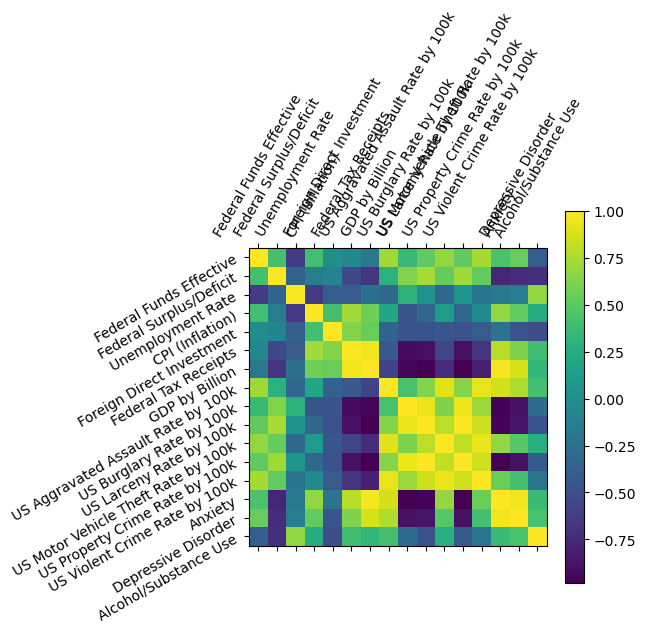

In [132]:
# Create a correlation matrix  for all columns in annual_df
correlation = annual_df.corr()
correlation

# Plot correlation heatmap for all columns in annual_df include a legend, make it a big plot

# Create a correlation matrix for all columns in annual_df
correlation = annual_df.corr()
print(correlation)

# Plot correlation heatmap for all columns in annual_df include a legend, make it a bigger plot
plt.figure(figsize=(20, 20))
plt.matshow(annual_df.corr())
plt.colorbar()
plt.xticks(range(len(annual_df.columns)), annual_df.columns, rotation=60)
plt.yticks(range(len(annual_df.columns)), annual_df.columns, rotation=30)
plt.show()


<Axes: >

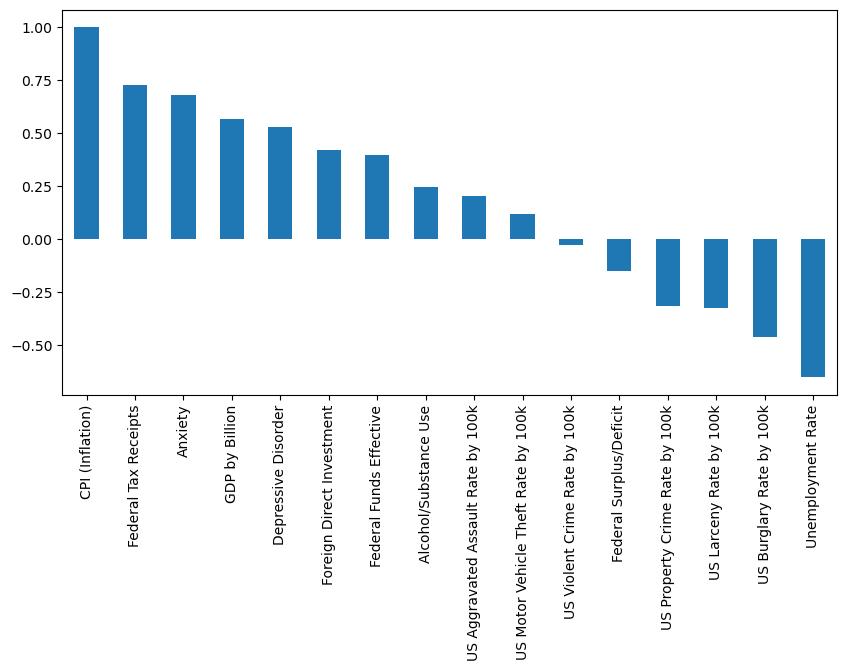

In [133]:
# show which columns are most correlated with the Inflation Rate
correlation['CPI (Inflation)'].sort_values(ascending=False)

# plot the correlation with the Inflation Rate as a bar chart
correlation['CPI (Inflation)'].sort_values(ascending=False).plot(kind='bar', figsize=(10, 5))



<Axes: >

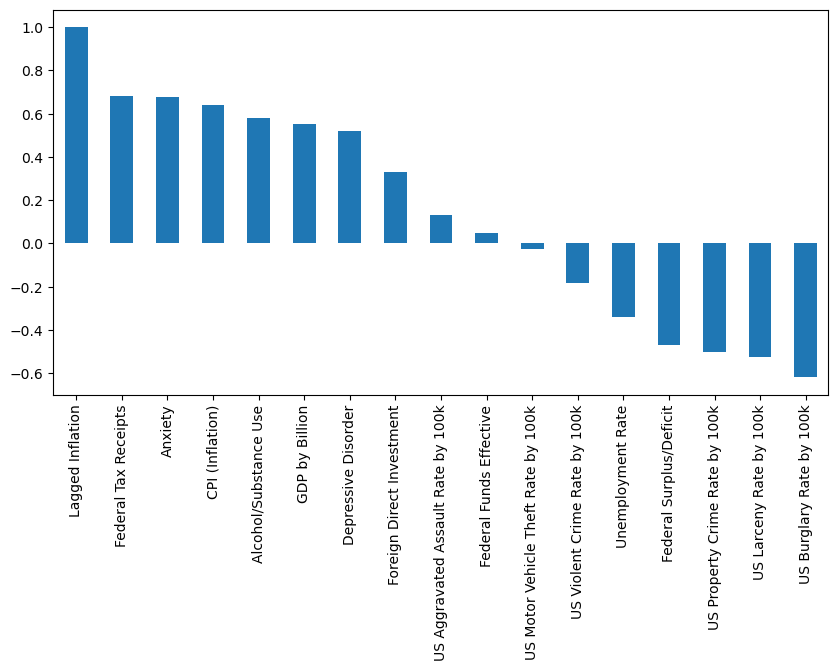

In [134]:
# create a lagged inflation column that tracks the inflation rate from the previous year
annual_df['Lagged Inflation'] = annual_df['CPI (Inflation)'].shift(-1)

# plot correlation of all columns with the lagged inflation column
correlation = annual_df.corr()
correlation['Lagged Inflation'].sort_values(ascending=False).plot(kind='bar', figsize=(10, 5))

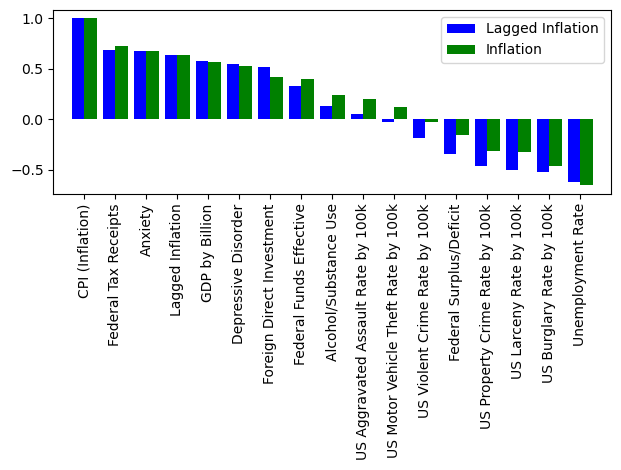

In [135]:




# plot correlation with lagged inflation and inflation on the same plot
lag_cor = correlation['Lagged Inflation'].sort_values(ascending=False)
std_cor = correlation['CPI (Inflation)'].sort_values(ascending=False)

# plot lag_cor and std_cor on the same plot
fig, ax = plt.subplots()
lag_cor.plot(kind='bar', color='blue', ax=ax, position=1, width=0.4)
std_cor.plot(kind='bar', color='green', ax=ax, position=0, width=0.4)
ax.legend(['Lagged Inflation', 'Inflation'])
# increase x limits to show all the columns
ax.set_xlim(-1, len(lag_cor))
# add gridlines
# make sure there is room for all axis labels
plt.tight_layout()
plt.show()

# save plots to file
fig.savefig('plots/lagged_correlation.png')



<Axes: >

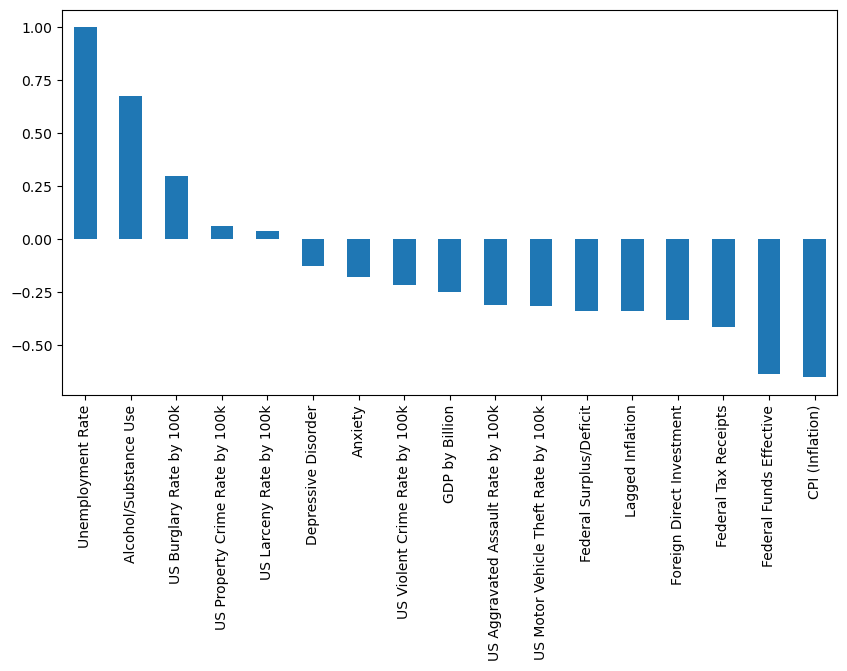

In [136]:
correlation['Unemployment Rate'].sort_values(ascending=False).plot(kind='bar', figsize=(10, 5))

In [137]:
monthly_df.head()


,Federal Funds Effective,Federal Surplus/Deficit,Unemployment Rate,CPI (Inflation)
DATE,,,,
2000-01-01,5.448387,62152.0,4.0,3.85
2000-02-01,5.734828,-41734.0,4.1,2.79
2000-03-01,5.853548,-35380.0,4.0,3.42
2000-04-01,6.019667,159497.0,3.8,2.28
2000-05-01,6.268065,-3611.0,4.0,2.85


In [138]:
quarterly_df.head()

,Federal Funds Effective,Federal Surplus/Deficit,Unemployment Rate,CPI (Inflation),Foreign Direct Investment,Federal Tax Receipts,GDP by Billion
DATE,,,,,,,
2000-01-01,5.678921,-4987.333333,4.033333,3.353333,207400.0,1272.073,10002.179
2000-04-01,6.272022,70591.333333,3.933333,2.756667,365568.0,1284.187,10247.720
2000-07-01,6.519430,20127.000000,4.000000,3.130000,318888.0,1291.650,10318.165
2000-10-01,6.475315,-781.666667,3.900000,2.883333,389484.0,1306.215,10435.744
2001-01-01,5.593687,-7483.666667,4.233333,3.303333,236820.0,1301.000,10470.231


In [139]:
annual_df.head()

# create columns in the annual_df that shift CPI (inflation) by -2, -1, 1, and 2 years
annual_df['Lagged Inflation 2'] = annual_df['CPI (Inflation)'].shift(-2)
annual_df['Lagged Inflation 1'] = annual_df['CPI (Inflation)'].shift(-1)
annual_df['Inflation 1'] = annual_df['CPI (Inflation)'].shift(1)
annual_df['Inflation 2'] = annual_df['CPI (Inflation)'].shift(2)

annual_df.head()


,Federal Funds Effective,Federal Surplus/Deficit,Unemployment Rate,CPI (Inflation),Foreign Direct Investment,Federal Tax Receipts,GDP by Billion,US Aggravated Assault Rate by 100k,US Burglary Rate by 100k,US Larceny Rate by 100k,...,US Property Crime Rate by 100k,US Violent Crime Rate by 100k,Anxiety,Depressive Disorder,Alcohol/Substance Use,Lagged Inflation,Lagged Inflation 2,Lagged Inflation 1,Inflation 1,Inflation 2
DATE,,,,,,,,,,,,,,,,,,,,,
2000-01-01,6.236422,21237.333333,3.966667,3.030833,320335.0,1288.53125,10250.95200,324.0,728.8,2477.3,...,3618.3,506.5,NaN,NaN,NaN,3.266667,2.591667,3.266667,NaN,NaN
2001-01-01,3.887125,7855.250000,4.741667,3.266667,168046.0,1226.82275,10581.92900,318.6,741.8,2485.7,...,3658.1,504.5,NaN,NaN,NaN,2.591667,1.681667,2.591667,3.030833,NaN
2002-01-01,1.667175,-19222.583333,5.783333,2.591667,85958.0,1053.18425,10929.10825,309.5,747.0,2450.7,...,3630.6,494.4,NaN,NaN,NaN,1.681667,2.432500,1.681667,3.266667,3.030833
2003-01-01,1.127535,-33254.916667,5.991667,1.681667,69512.0,1053.86400,11456.44950,295.4,741.0,2416.5,...,3591.2,475.8,NaN,NaN,NaN,2.432500,2.762500,2.432500,2.591667,3.266667
2004-01-01,1.348928,-33253.166667,5.541667,2.432500,151731.0,1140.59650,12217.19575,288.6,730.3,2362.3,...,3514.1,463.2,NaN,NaN,NaN,2.762500,3.132500,2.762500,1.681667,2.591667


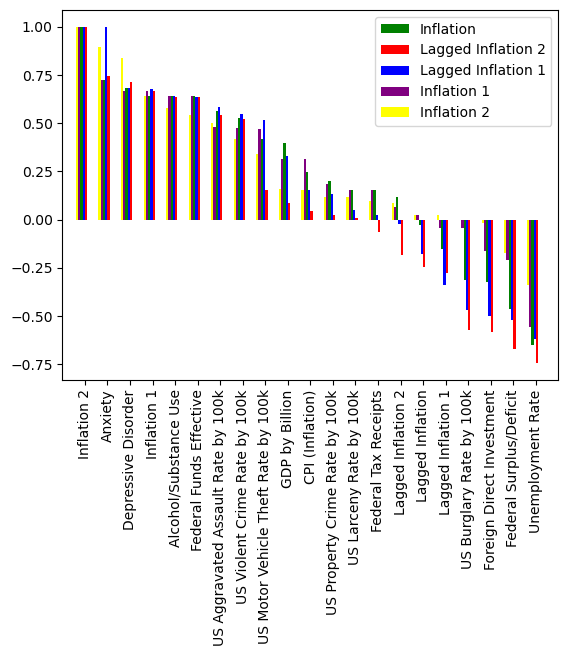

In [140]:
annual_df.head()

correlation = annual_df.corr()


# plot correlation with lagged inflation and inflation on the same plot
cor_lag_2 = correlation['Lagged Inflation 2'].sort_values(ascending=False)
cor_lag_1 = correlation['Lagged Inflation 1'].sort_values(ascending=False)
cor_inflation_1 = correlation['Inflation 1'].sort_values(ascending=False)
cor_inflation_2 = correlation['Inflation 2'].sort_values(ascending=False)
cor = correlation['CPI (Inflation)'].sort_values(ascending=False)

# plot lag_cor and std_cor on the same plot
fig, ax = plt.subplots()
cor.plot(kind='bar', color='green', ax=ax, position=2, width=0.1)
cor_lag_2.plot(kind='bar', color='red', ax=ax, position=0, width=0.1)
cor_lag_1.plot(kind='bar', color='blue', ax=ax, position=1, width=0.1)
cor_inflation_1.plot(kind='bar', color='purple', ax=ax, position=3, width=0.1)
cor_inflation_2.plot(kind='bar', color='yellow', ax=ax, position=4, width=0.1)
ax.legend(['Inflation', 'Lagged Inflation 2', 'Lagged Inflation 1', 'Inflation 1', 'Inflation 2'])
# expand x-limits to fit all data
ax.set_xlim(-1, 21)
plt.xticks(rotation=90)

plt.show()



In [141]:
# write annual_df to a csv file
annual_df.to_csv('resources/annual_df.csv')

# write quarterly_df to a csv file
quarterly_df.to_csv('resources/quarterly_df.csv')

# write monthly_df to a csv file
monthly_df.to_csv('resources/monthly_df.csv')

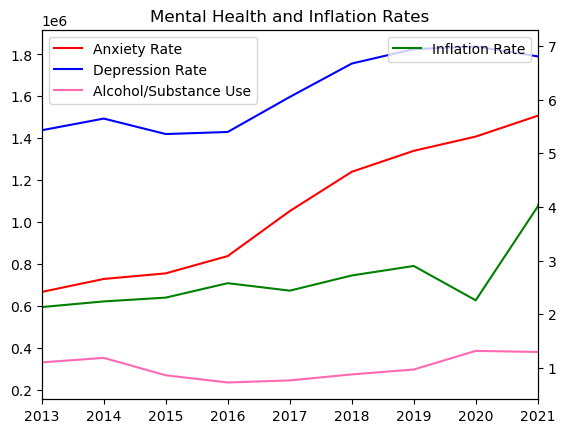

In [142]:
# plot the Anxiety, Depression,Alcohol/Substance Use and Inflation rates on the same plot limit the x-axis to 2013-2021
fig, ax = plt.subplots()
ax.plot(annual_df.index, annual_df['Anxiety'], color='red', label='Anxiety Rate')
ax.plot(annual_df.index, annual_df['Depressive Disorder'], color='blue', label='Depression Rate')
ax.plot(annual_df.index, annual_df['Alcohol/Substance Use'], color='hotpink', label='Alcohol/Substance Use')
ax2 = ax.twinx()
ax2.plot(annual_df.index, annual_df['CPI (Inflation)'], color='green', label='Inflation Rate')
ax.legend(loc='upper left')
ax2.legend(loc='upper right')
ax.set_xlim(pd.Timestamp('2013-01-01'), pd.Timestamp('2021-01-01'))
# add a title
plt.title('Mental Health and Inflation Rates')
plt.show()

# save the plot to a file
fig.savefig('plots/mental_health_inflation.png')


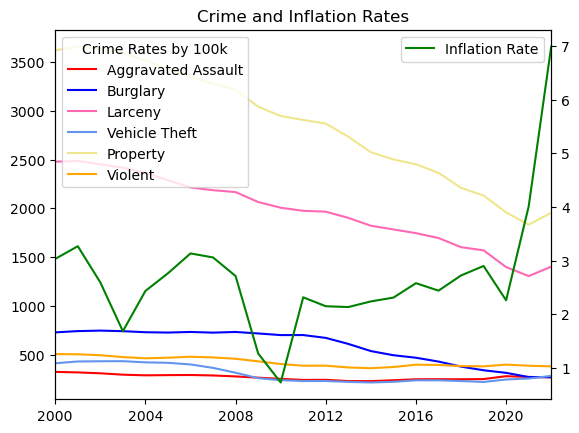

In [143]:
# plot the Crime and Inflation rates on the same plot limit the x-axis to 2000-2022
fig, ax = plt.subplots()
ax.plot(annual_df.index, annual_df['US Aggravated Assault Rate by 100k'], color='red', label='Aggravated Assault')
ax.plot(annual_df.index, annual_df['US Burglary Rate by 100k'], color='blue', label='Burglary')
ax.plot(annual_df.index, annual_df['US Larceny Rate by 100k'], color='hotpink', label='Larceny')
ax.plot(annual_df.index, annual_df['US Motor Vehicle Theft Rate by 100k'], color='cornflowerblue', label='Vehicle Theft')
ax.plot(annual_df.index, annual_df['US Property Crime Rate by 100k'], color='khaki', label='Property')
ax.plot(annual_df.index, annual_df['US Violent Crime Rate by 100k'], color='orange', label='Violent')
ax2 = ax.twinx()
ax2.plot(annual_df.index, annual_df['CPI (Inflation)'], color='green', label='Inflation Rate')
ax.legend(loc='upper left', title='Crime Rates by 100k')
ax2.legend(loc='upper right')
ax.set_xlim(pd.Timestamp('2000-01-01'), pd.Timestamp('2022-01-01'))
# add a title
plt.title('Crime and Inflation Rates')
# add title to legend 1

plt.show()

# save the plot to a file
fig.savefig('plots/crime_inflation.png')

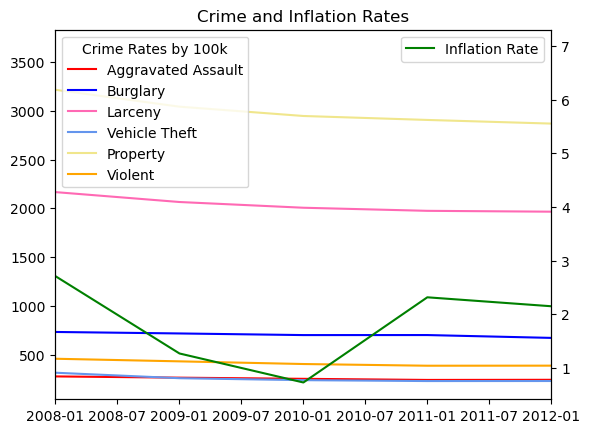

In [144]:
# create same plot as last block but limit to the years 2008-2012
fig, ax = plt.subplots()
ax.plot(annual_df.index, annual_df['US Aggravated Assault Rate by 100k'], color='red', label='Aggravated Assault')
ax.plot(annual_df.index, annual_df['US Burglary Rate by 100k'], color='blue', label='Burglary')
ax.plot(annual_df.index, annual_df['US Larceny Rate by 100k'], color='hotpink', label='Larceny')
ax.plot(annual_df.index, annual_df['US Motor Vehicle Theft Rate by 100k'], color='cornflowerblue', label='Vehicle Theft')
ax.plot(annual_df.index, annual_df['US Property Crime Rate by 100k'], color='khaki', label='Property')
ax.plot(annual_df.index, annual_df['US Violent Crime Rate by 100k'], color='orange', label='Violent')
ax2 = ax.twinx()
ax2.plot(annual_df.index, annual_df['CPI (Inflation)'], color='green', label='Inflation Rate')
ax.legend(loc='upper left', title='Crime Rates by 100k')
ax2.legend(loc='upper right')
ax.set_xlim(pd.Timestamp('2008-01-01'), pd.Timestamp('2012-01-01'))
# add a title
plt.title('Crime and Inflation Rates')


plt.show()



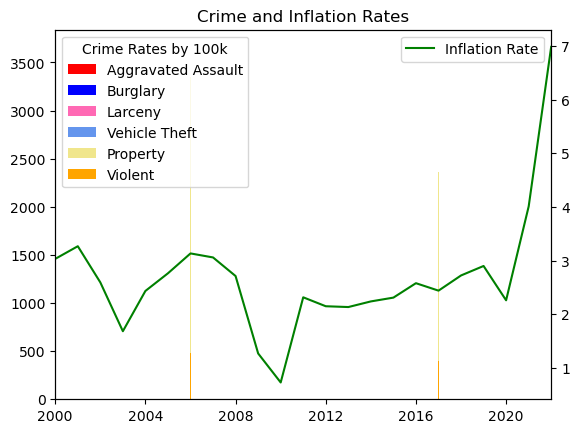

In [145]:
# plot the Crime and Inflation rates on the same plot limit the x-axis to 2000-2022
fig, ax = plt.subplots()
ax.bar(annual_df.index, annual_df['US Aggravated Assault Rate by 100k'], color='red', label='Aggravated Assault')
ax.bar(annual_df.index, annual_df['US Burglary Rate by 100k'], color='blue', label='Burglary')
ax.bar(annual_df.index, annual_df['US Larceny Rate by 100k'], color='hotpink', label='Larceny')
ax.bar(annual_df.index, annual_df['US Motor Vehicle Theft Rate by 100k'], color='cornflowerblue', label='Vehicle Theft')
ax.bar(annual_df.index, annual_df['US Property Crime Rate by 100k'], color='khaki', label='Property')
ax.bar(annual_df.index, annual_df['US Violent Crime Rate by 100k'], color='orange', label='Violent')
ax2 = ax.twinx()
ax2.plot(annual_df.index, annual_df['CPI (Inflation)'], color='green', label='Inflation Rate')
ax.legend(loc='upper left', title='Crime Rates by 100k')
ax2.legend(loc='upper right')
ax.set_xlim(pd.Timestamp('2000-01-01'), pd.Timestamp('2022-01-01'))
# add a title
plt.title('Crime and Inflation Rates')
# add title to legend 1

plt.show()


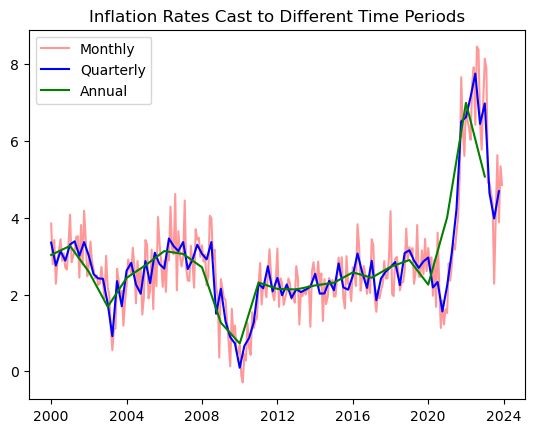

In [146]:
# Plot the CPI (Inflation) column from the monthly_df, quarterly_df, and annual_df on the same plot
fig, ax = plt.subplots()
ax.plot(monthly_df.index, monthly_df['CPI (Inflation)'], color='red', alpha=0.4, label='Monthly')
ax.plot(quarterly_df.index, quarterly_df['CPI (Inflation)'], color='blue', label='Quarterly')
ax.plot(annual_df.index, annual_df['CPI (Inflation)'], color='green', label='Annual')
ax.legend(loc='upper left')
# add a title
plt.title('Inflation Rates Cast to Different Time Periods')
plt.show()

# Save the plot
fig.savefig('plots/period_casting.png')

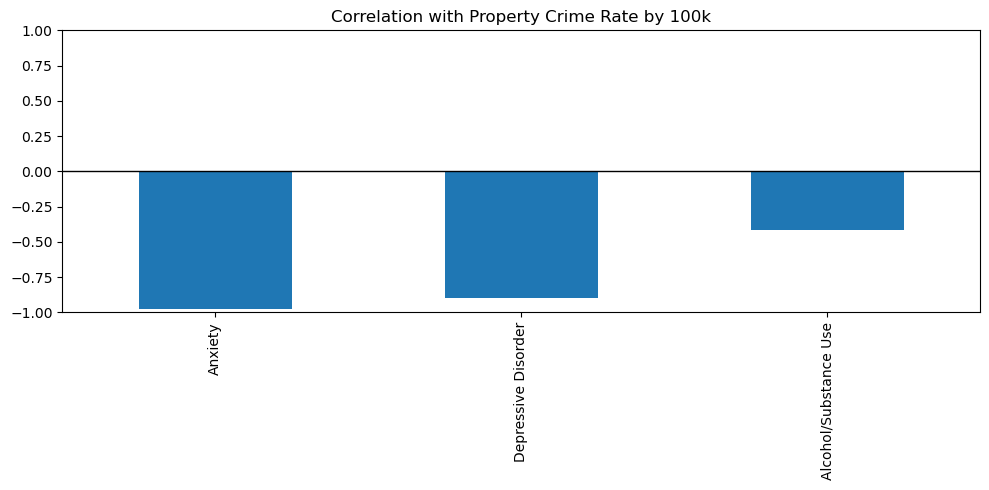

<Figure size 640x480 with 0 Axes>

In [150]:
# Plot correlation of Property Crime Rate by 100k with the Anxiety, Depression, and Subastance Use columns from the annual_df

correlation = annual_df.corr()

correlation['US Property Crime Rate by 100k'][['Anxiety', 'Depressive Disorder', 'Alcohol/Substance Use']].plot(kind='bar', figsize=(10, 5))
# Set y limits to -1 to 1
plt.ylim(-1, 1)
# add a zero line
plt.axhline(0, color='black', lw=1)
# add a title
plt.title('Correlation with Property Crime Rate by 100k')
# make sure there is room for all axis labels
plt.tight_layout()

plt.show()

# save the figure
plt.savefig('plots/property_crime_mental_health_correlation.png')

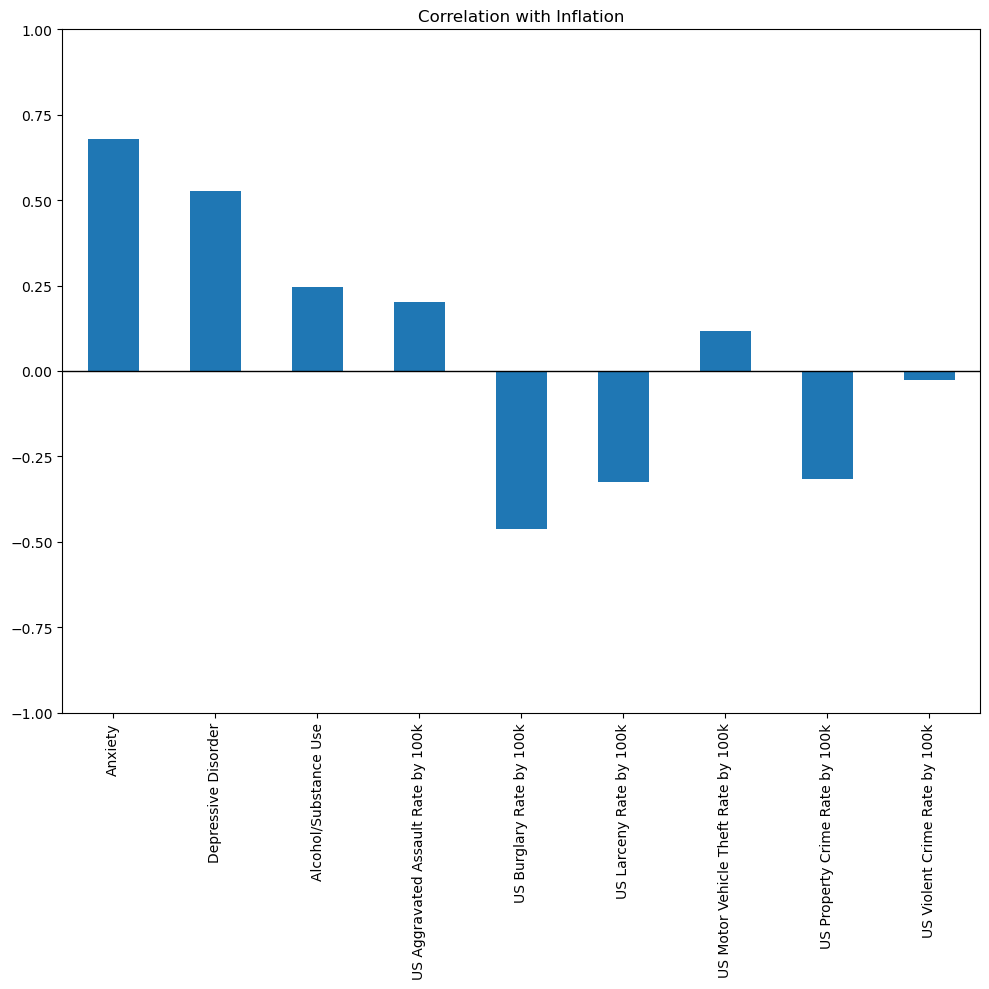

<Figure size 640x480 with 0 Axes>

In [154]:
# plot the correlation of CPI (Inflation) with the Anxiety, Depression, Substance Use, and all Crime Rate columns from the annual_df
correlation['CPI (Inflation)'][['Anxiety', 'Depressive Disorder', 'Alcohol/Substance Use', 'US Aggravated Assault Rate by 100k', 'US Burglary Rate by 100k', 'US Larceny Rate by 100k', 'US Motor Vehicle Theft Rate by 100k', 'US Property Crime Rate by 100k', 'US Violent Crime Rate by 100k']].plot(kind='bar', figsize=(10, 10))
# Set y limits to -1 to 1
plt.ylim(-1, 1)
# add a zero line
plt.axhline(0, color='black', lw=1)
# add a title
plt.title('Correlation with Inflation')
# make sure there is room for all axis labels
plt.tight_layout()

plt.show()

# Save  the plot
plt.savefig('plots/inflation_correlation_with_social_behaviors.png')
